# Star Density

In [1]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import healpy as hp

In [4]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

from lsst.sims.maf.db import ResultsDb

In [5]:
import sys
print(sys.path)

['/Users/dagoret/MacOSX/GitHub/LSST/MyCadence/StarDensity', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/obs_lsst/19.0.0-80-g0bd2bb3+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_dateloc/master-g60a36c8d46+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/ts_observatory_model/master-g3d307a5f45+46/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_almanac/master-g021b69e146+1/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_downtimeModel/master-g55f72efa65+17/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_cloudModel/master-ge3724df529+19/python', '/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/

### Specify my other python path (my installation)

In [6]:
otherpythonpaths=['/Users/dagoret/anaconda3/lib/python37.zip', '/Users/dagoret/anaconda3/lib/python3.7', '/Users/dagoret/anaconda3/lib/python3.7/lib-dynload', '', '/Users/dagoret/.local/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/dagoret/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/dagoret/.ipython']

In [7]:
for thepath in otherpythonpaths:
    sys.path.append(thepath) # go to parent dir

In [8]:
%load_ext autoreload
%autoreload 2

# Config

# Simu data

In [9]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_stellardensity'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [10]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric =metrics.starDensity.StarDensityMetric(rmagLimit=25.0, units='stars/sq arcsec', maps=['StellarDensityMap'])

summaryMetrics = [metrics.MinMetric(), metrics.MedianMetric(),
                  metrics.MaxMetric(), metrics.RmsMetric()]


# Slicer

In [11]:
slicer = slicers.HealpixSlicer(nside=128)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


# Bundle

- Bundles dict for all filter

In [12]:
plotDict = {'colorMax': 75}
plotDict = {'colorMin':0, 'colorMax': 40 , 'cbarFormat': '%0.2f'}
# only plot the sky maps for now
plotFuncs = [plots.HealpixSkyMap()]

In [13]:
bundles = {}

bundles["stardensity"] = metricBundles.MetricBundle(metric, slicer, "",summaryMetrics=summaryMetrics)
print(bundles["stardensity"].dbCols)

{'fieldDec', 'fieldRA'}


In [14]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir,resultsDb=resultsDb)

Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'fieldRA'].
Found 2372700 visits
Running:  ['stardensity']


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/slicers/baseSpatialSlicer.py:107: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn('Warning:  Loading maps but cache on.'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 5658 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0131612  dipole: lon: -97.964, lat: -4.02549, amp: 0.0217653
Plotting complete.


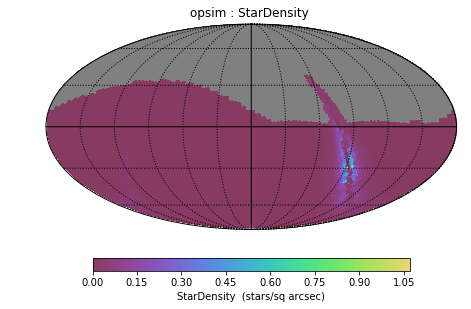

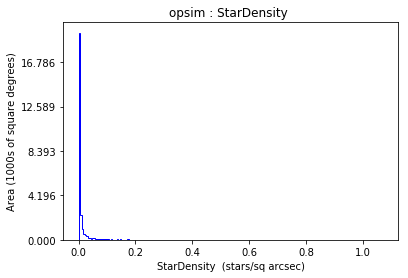

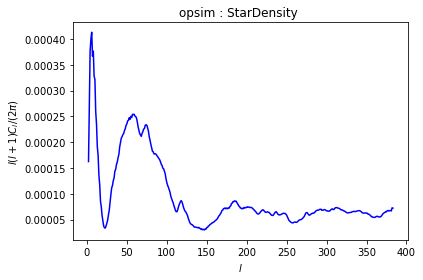

In [15]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [16]:
bundles["stardensity"].results

AttributeError: 'MetricBundle' object has no attribute 'results'

In [21]:
bundles["stardensity"].dbCols

{'fieldDec', 'fieldRA'}

In [22]:
bundles["stardensity"].metricValues.shape

(196608,)

In [23]:
bundles["stardensity"].metricValues[:100]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  Tru

In [24]:
bundles["stardensity"].metricValues[:-100]

masked_array(data=[--, --, --, ..., 0.0022333333333333515,
                   0.0022333333333333515, 0.0026083333333333522],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=-1.6375e+30)

monopole: 0.0131612  dipole: lon: -97.964, lat: -4.02549, amp: 0.0217653


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 5658 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

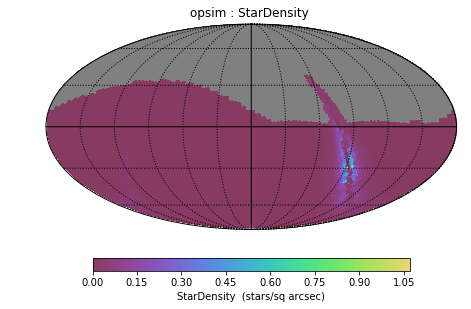

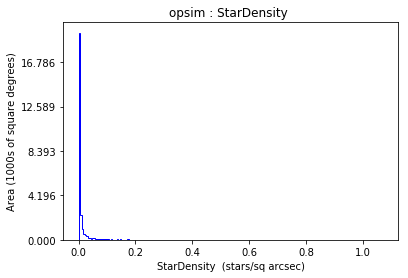

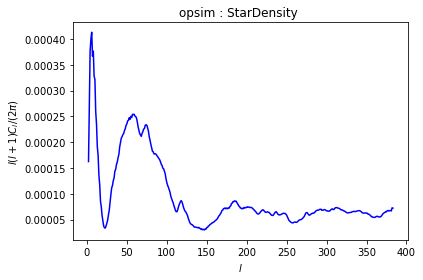

In [30]:
bundles["stardensity"].plot()

In [63]:
themap=bundles["stardensity"].metricValues

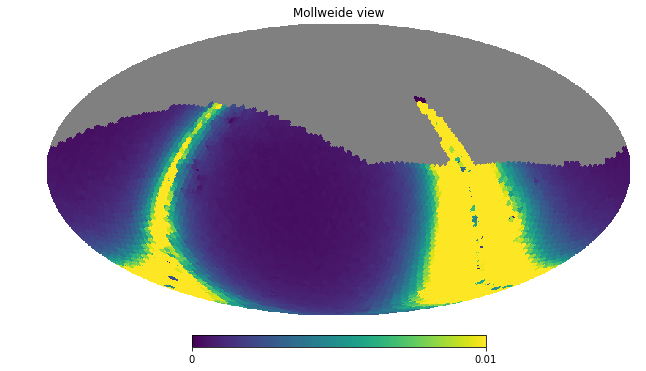

In [69]:
hp.mollview(themap, max=0.01)

In [67]:
themap.data.shape

(196608,)